In [98]:
from nba_api.stats.endpoints import leagueleaders
import pandas as pd
import seaborn as sb

import matplotlib.pyplot as plt

LL = leagueleaders.LeagueLeaders()
L_LL = LL.get_data_frames()
df_LL=L_LL[0]

from nba_api.stats.endpoints import playergamelog
import pandas as pd

#Call the API endpoint passing in lebron's ID & which season 
gamelog_JT = playergamelog.PlayerGameLog(player_id='1628369')

#Converts gamelog object into a pandas dataframe
#can also convert to JSON or dictionary  
JT_games_19 = gamelog_JT.get_data_frames()
JT_games_19_play=JT_games_19[0]

#Call the API endpoint passing in lebron's ID & which season 
gamelog_Brad = playergamelog.PlayerGameLog(player_id='203078')

#Converts gamelog object into a pandas dataframe
#can also convert to JSON or dictionary  
BB_games_19 = gamelog_Brad.get_data_frames()
BB_games_19_play=BB_games_19[0]


#Call the API endpoint passing in lebron's ID & which season 
gamelog_SC = playergamelog.PlayerGameLog(player_id='201939')

#Converts gamelog object into a pandas dataframe
#can also convert to JSON or dictionary  
SC_games_19 = gamelog_SC.get_data_frames()
SC_games_19_play=SC_games_19[0]

In [99]:
SC=SC_games_19_play.loc[:,['FG3A']]
SC.columns=['Steph Curry']
BB=BB_games_19_play.loc[:,['FG3A']]
BB.columns=['Bradely Beal']
JT=JT_games_19_play.loc[:,['FG3A']]
JT.columns=['Jason Tatum']
SC_C = SC["Steph Curry"]
BB_B = BB["Bradely Beal"]
anov_a = JT.join(SC_C)
anov_b = anov_a.join(BB_B)
anov_b

,Jason Tatum,Steph Curry,Bradely Beal
0,9,7,7
1,8,10,9
2,8,14,10
3,8,6,5
4,11,12,5
5,5,16,3
6,3,12,5
7,9,9,7
8,6,15,5
9,13,10,8


In [100]:
anov_b.describe()


,Jason Tatum,Steph Curry,Bradely Beal
count,10.000000,10.000000,10.000000
mean,8.000000,11.100000,6.400000
std,2.867442,3.314949,2.170509
min,3.000000,6.000000,3.000000
25%,6.500000,9.250000,5.000000
50%,8.000000,11.000000,6.000000
75%,9.000000,13.500000,7.750000
max,13.000000,16.000000,10.000000


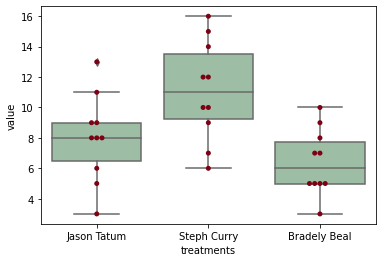

In [101]:

df_melt = pd.melt(anov_b.reset_index(), id_vars=['index'], value_vars=['Jason Tatum', 'Steph Curry', 'Bradely Beal'])
df_melt.columns = ['index', 'treatments', 'value']
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [102]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),114.2,2.0,7.160706,0.003199
Residual,215.3,27.0,NaN,NaN
